In [1]:
pip install networkx


As ligações (arestas) do grafo são:
(0, 1)
(0, 4)
(0, 5)
(1, 2)
(1, 6)
(2, 3)
(2, 7)
(3, 4)
(3, 8)
(4, 9)
(5, 7)
(5, 8)
(6, 8)
(6, 9)
(7, 9)


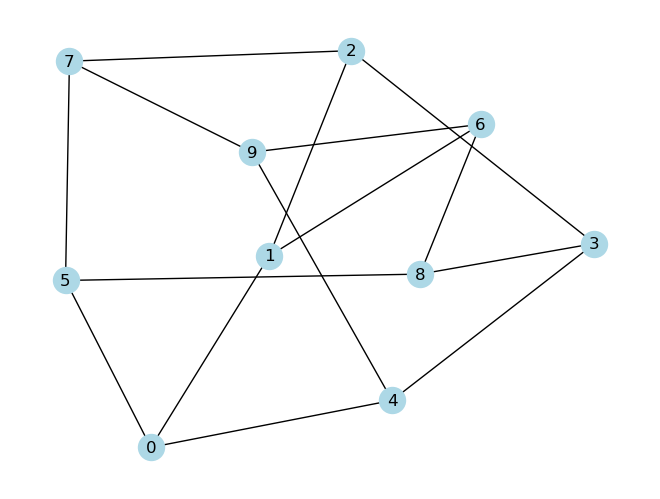

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

# Criação do grafo de Petersen
G = nx.petersen_graph()

# mostrar as arestas em forma de lista
arestas = list(G.edges())
print("As ligações (arestas) do grafo são:")
for aresta in arestas:
    print(aresta)

# #mostrar ligações em forma de matriz
matriz_adj = nx.adjacency_matrix(G).todense()
print("Matriz do Grafo:")
print(matriz_adj)

# Desenhando o grafo
pos = nx.spring_layout(G)  # layout para uma melhor visualização
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=350)
plt.show()


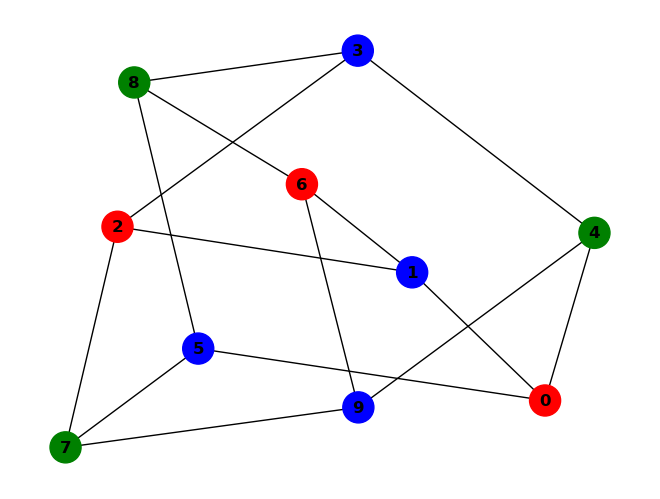

In [4]:
import networkx as nx
import matplotlib.pyplot as pltfd

# Criação do grafo de Petersen
G = nx.petersen_graph()

# Algoritmo de coloração de Welch-Powell
color_map = nx.coloring.greedy_color(G, strategy='largest_first')

# Mapear cores para os nós
colors = ['red', 'blue', 'green', 'yellow']
node_colors = [colors[color_map[node]] for node in G.nodes()]

# Desenhando o grafo
pos = nx.spring_layout(G)  # layout para uma melhor visualização
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=500, font_weight='bold')
plt.show()


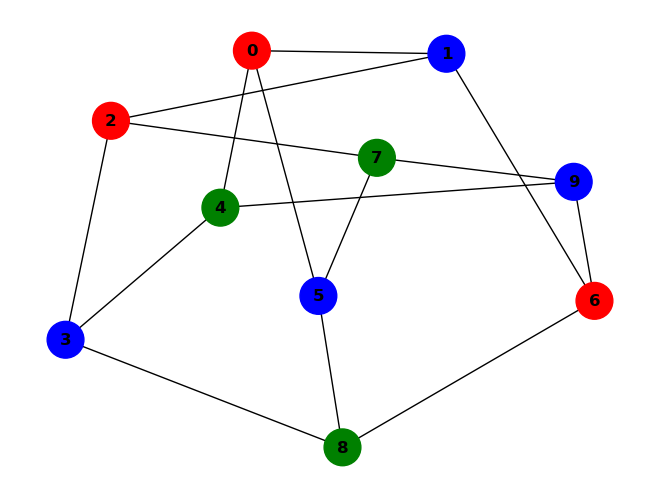

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

# Criação do grafo de Petersen
G = nx.petersen_graph()

# Algoritmo de coloração de Welch-Powell
color_map = nx.coloring.greedy_color(G, strategy='largest_first')

# Mapear cores para os nós
colors = ['red', 'purple', 'green', 'yellow']
node_colors = [colors[color_map[node]] for node in G.nodes()]

# Desenhando o grafo
pos = nx.spring_layout(G)  # layout para uma melhor visualização
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=700, font_weight='bold')
plt.show()


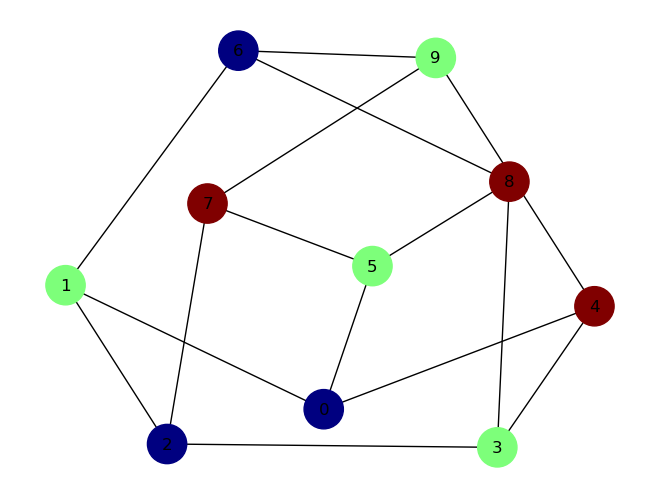

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

def welsh_powell(graph):
    #ordenar os vértices em ordem decrescente de grau
    sorted_nodes = sorted(graph.degree, key=lambda x: x[1], reverse=True)
    sorted_nodes = [node for node, degree in sorted_nodes]
    
    #armazenar as cores dos vértices
    coloring = {}
    
    #cor atual
    current_color = 0
    #enquanto houver índices não coloridos
    while sorted_nodes:
        #escolhe um vértice não colorido
        node = sorted_nodes.pop(0)
        if node not in coloring:
            coloring[node] = current_color
            # atribui a mesma cor aos vértices não adjacentes
            non_adjacent = [node]
            for n in sorted_nodes:
                if all(graph.has_edge(n, adj) == False for adj in non_adjacent):
                    coloring[n] = current_color
                    non_adjacent.append(n)
            # remove os vértices coloridos da lista
            sorted_nodes = [n for n in sorted_nodes if n not in non_adjacent]
            current_color += 1
    
    return coloring

#criação do grafo
G = nx.petersen_graph()
# G.add_edges_from(edges)

#aplicação do algoritmo de Welsh-Powell
coloring = welsh_powell(G)

#visualização do grafo
colors = [coloring[node] for node in G.nodes]
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color=colors, node_size=800, cmap=plt.cm.jet)
plt.show()
